Notebook to perform tabular Q-learning on Frozen Lake environment

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from utils import q_learning, find_opt_vq, sliding_avg, fancy_visual

In [2]:
# Initialize gym environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Obtaining environment details
print('Number of Actions:', env.action_space.n)
print('Number of States: ', env.observation_space.n)

Number of Actions 4
Number of States  16


In [3]:
# 1. Tabular Q learning

Q_star = np.load("q_star.npy") # Load Q_star from VI.ipynb

# Define hyperparameters for Q learning
max_ep = 20000 # max episodes
max_step = 100 # max steps per trajectory
gamma = 0.90 # discount factor

# epsilon
eps_max = 1.0
eps_min = 0.02
eps_decay = 0.001

# learning rate
alpha_max = 1
alpha_min = 0.01
alpha_decay = 0.001

Q_tab_star, hist_q, hist_qstar, hist_ret = q_learning(env, gamma, max_ep, max_step, eps_max, eps_min, eps_decay, alpha_max, alpha_min, alpha_decay, Q_star) # perform Q learning

Text(0, 0.5, 'Return value')

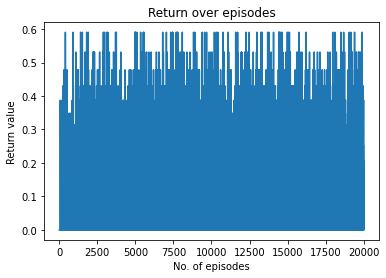

In [4]:
# 2. Plot showing return

plt.plot(hist_ret)
plt.title("Return over episodes")
plt.xlabel("No. of episodes")
plt.ylabel("Return value")

Text(0, 0.5, '||Q - Q*||_2 value')

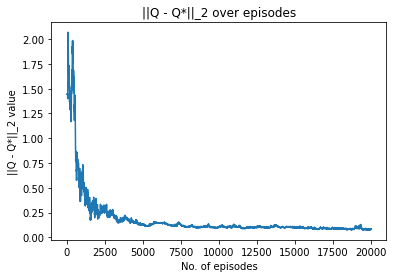

In [5]:
# 2. Plot showing ||Q - Q*||_2

plt.plot(hist_qstar)
plt.title("||Q - Q*||_2 over episodes")
plt.xlabel("No. of episodes")
plt.ylabel("||Q - Q*||_2 value")

Text(0, 0.5, 'Return value')

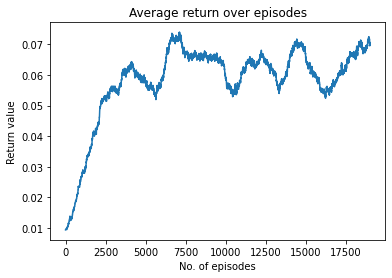

In [6]:
# 3. Plot showing return with sliding average

hist_ret_avg = sliding_avg(hist_ret, win_len = 1000)
plt.plot(hist_ret_avg)
plt.title("Average return over episodes")
plt.xlabel("No. of episodes")
plt.ylabel("Return value")

Text(0, 0.5, '||Q - Q*||_2 value')

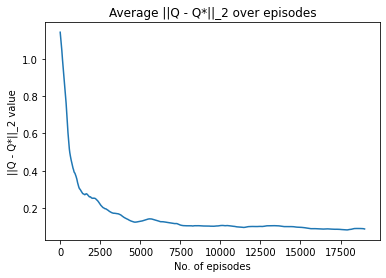

In [7]:
# 4. Plot showing ||Q - Q*||_2 with sliding average

hist_qstar_avg = sliding_avg(hist_qstar, win_len = 1000)
plt.plot(hist_qstar_avg)
plt.title("Average ||Q - Q*||_2 over episodes")
plt.xlabel("No. of episodes")
plt.ylabel("||Q - Q*||_2 value")

In [8]:
# 5. Computing optimal policy

opt_val, opt_pol = find_opt_vq(env, Q_tab_star) # compute optimal policy and optimal value
print("Optimal policy:", opt_pol)

Optimal policy: [0. 3. 0. 3. 0. 0. 2. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


Value Function [0.06890578 0.05896143 0.07322535 0.0525422  0.08980852 0.
 0.10856642 0.         0.1397512  0.2454025  0.27981705 0.
 0.         0.40366411 0.67794753 0.        ]
Policy [0. 3. 0. 3. 0. 0. 2. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


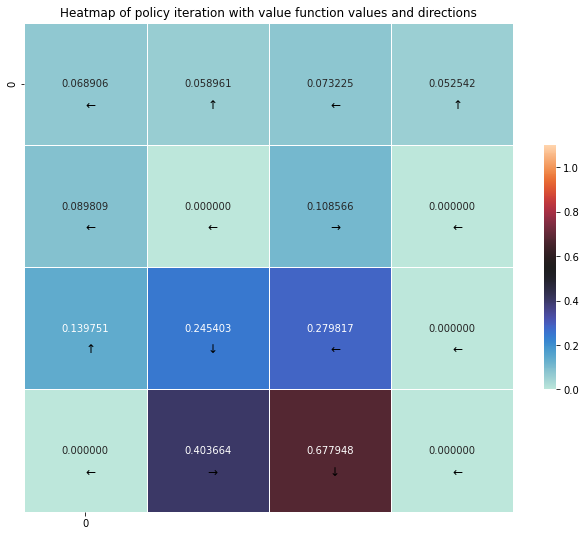

In [9]:
# 6. Visualize optimal value and optimal policy

fancy_visual(opt_val, opt_pol)